Tennis Data

1-How many tennis players are included in the dataset?

In [ ]:
import pandas as pd

file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\away_team.csv"
away_team_df=pd.read_csv(file_path)
#away_team_df.head()

import pandas as pd
file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\home_team.csv"
home_team_df=pd.read_csv(file_path)
#home_team_df.head() 

# cleaning data for away
away_team_df['player_id'].dropna()
str_rows =away_team_df[away_team_df['player_id'].apply(lambda x: isinstance(x, str))]
print(str_rows)
df_unique_player_id = away_team_df['player_id'].drop_duplicates()

# using three methods to check if the results are the same.
len(df_unique_player_id)
# len = 2479
away_team_df['player_id'].nunique()
# 2479

#cleaning data for home
home_team_df['player_id'].dropna()
str_rows_home =home_team_df[home_team_df['player_id'].apply(lambda x: isinstance(x, str))]
home_df_unique_player_id = home_team_df['player_id'].drop_duplicates()

len(home_df_unique_player_id)
# len = 2447

print(f'The whole number of tennis players in this tournament is :{len(home_df_unique_player_id)+len(df_unique_player_id)}')
# final result = 4926

 matplotlib.pyplot as plt
plt.hisimportt(df_unique_player_id , bins=20 , edgecolor='black')
plt.xlabel('Player ID')
plt.ylabel('Frequesncy')
plt.title('Histogram of Player IDs')

2-What is the average height of the players?

In [ ]:
import pandas as pd
file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\away_team.csv"
away_team_df=pd.read_csv(file_path)
away_team_df.head()

import pandas as pd
file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\home_team.csv"
home_team_df=pd.read_csv(file_path)
home_team_df.head()

# checking null, not string data and between 0 , 1
away_team_df['height'].dropna()
away_team_df['height'].min() 
away_team_df['height'].max()
str_rows_away = away_team_df[away_team_df['height'].apply(lambda x: isinstance(x, str))]
#print(str_rows)
home_team_df['height'].dropna()
away_team_df['height'].min() 
away_team_df['height'].max()
str_rows_home = home_team_df[home_team_df['height'].apply(lambda x: isinstance(x, str))]

# calculating mean of height for away
away_height_mean = away_team_df['height'].mean()
 #calculating mean for home
home_height_mean = home_team_df['height'].mean()

final_mean_height = (away_height_mean + home_height_mean)/2
final_mean_height

3-Which player has the highest number of wins?

In [ ]:
import pandas as pd
file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\away_team.csv"
away_team_df=pd.read_csv(file_path)
#away_team_df.head()


file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\home_team.csv"
home_team_df=pd.read_csv(file_path)
#home_team_df.head()


file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\event.csv"
event_df=pd.read_csv(file_path)
#event_df.head()

home_away_merged = pd.merge(home_team_df , away_team_df , on = 'match_id' , suffixes=['_home', '_away'])


filtered_home = home_team_df[['match_id', 'player_id', 'slug']]
filtered_away = away_team_df[['match_id', 'player_id', 'slug']]

home_away_merged = pd.merge( filtered_home , filtered_away , on = 'match_id' , suffixes=['_home', '_away'])


filtered_event = event_df[['match_id', 'winner_code']]
event_home_away_merged = pd.merge(home_away_merged , filtered_event , on='match_id' )

 # for home team
filtered_event_home_away_merged = event_home_away_merged[event_home_away_merged['winner_code']==1]
df = filtered_event_home_away_merged.groupby('player_id_home').count()
df2 = df['winner_code'].max()

df.loc[df['winner_code'] ==191 , ['winner_code']]
home_team_df.loc[home_team_df['player_id']== 231620 , ['name', 'slug']].drop_duplicates()
# for home team: winner_code = 191 , player_id = 231620 

# for away team
filtered_event_home_away_merged = event_home_away_merged[event_home_away_merged['winner_code']==2]
df = filtered_event_home_away_merged.groupby('player_id_away').count()
df2 = df['winner_code'].max()
# max for winner_code = 206
df.loc[df['winner_code'] ==206 , ['winner_code']]
home_team_df.loc[home_team_df['player_id']== 94747 , ['name', 'slug']].drop_duplicates()
# player_id = 94747 , name Hong A.

4-What is the longest match recorded in terms of duration?

In [ ]:
import pandas as pd
import numpy as np
import os
if os.path.exists('time.csv'):
    os.remove('time.csv')
file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\time.csv"
time_df=pd.read_csv(file_path)
#time_df.head()
match_id_columns = time_df[['match_id' , 'current_period_start_timestamp']]
# cleaning data:
#1.
time_df.max()
# there are diffent numbers. we must convert them to a unique unit. I choose 'minute'
#2.
#time_df.min()
# there are some negative numbers such as -1.62.... We have to replace them by 0.
# converting all durations to minute
#time_df = time_df.dropna(axis='columns', how='all')
#perio4 and period5 are deleted because they were all Nan

time_df = time_df[['period_1', 'period_2','period_3']]
#time_df = time_df.clip(lower=0)
#time_df = time_df.fillna(0.0)
time_df = time_df.map(lambda x: 0 if pd.isna(x) or x <0 else 
                                    (x ==6000 if x> 6000 else
                                     (x/60 if (x>=300 and x<=6000) else 
                                      x 
                                     )))

# checking min and max again to ensure that null and negative data are gone and also all of data are converted to minute
time_df.max()


# min = 0, max = logical and period_4 and period_5 columns are deleted because they included NaN data
time_df['match_time'] = time_df.sum(axis=1)
# a table with match time is made
time_df.max()

time_df = match_id_columns.join(time_df)
time_df
time_df.max()


5-How many sets are typically played in a tennis match?

جواب: در جداول دیتایی که در دست ما بود سه ست محاسبه شده. چون همانطور که در جدول امتیازات تیم مهمان و میزبان دیدیم پنج تا پریود وحود داشت

6-Which country has produced the most successful tennis players?

In [ ]:
import pandas as pd
file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\away_team.csv"
away_team_df=pd.read_csv(file_path)
#away_team_df.head()


file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\home_team.csv"
home_team_df=pd.read_csv(file_path)
#home_team_df.head()


file_path=r"C:\Users\Dell\.vscode\DataScienceProjects\daneshkar_first_team_project\data\processed\event.csv"
event_df=pd.read_csv(file_path)
event_df.head()

home_away_merged = pd.merge(home_team_df , away_team_df , on = 'match_id' , suffixes=['_home', '_away'])
#display(home_away_merged)

filtered_home = home_team_df[['match_id', 'country']]
filtered_away = away_team_df[['match_id', 'country']]
home_away_merged = pd.merge( filtered_home , filtered_away , on = 'match_id' , suffixes=['_home', '_away'])
#display(home_away_merged)

filtered_event = event_df[['match_id', 'winner_code']]
event_home_away_merged = pd.merge(home_away_merged , filtered_event , on='match_id' )
#display(event_home_away_merged)

event_home_away_merged['winner_country'] = event_home_away_merged.apply(lambda row: row['country_home'] if row['winner_code']==1 
                                                                        else row['country_away'], axis=1)
display(event_home_away_merged)
win_counts = event_home_away_merged['winner_country'].value_counts().reset_index()
win_counts.columns = [ 'country' , 'total_wins']
display(win_counts) 
# So, France has produced the most successful tennis players

7-What is the average number of aces per match?

In [ ]:
import pandas as pd

# مسیر فایل
path = r"E:\tennis project\data\statistics.csv"

# خواندن فایل CSV
statics = pd.read_csv(path)

# پاکسازی اولیه
statics.columns = statics.columns.str.strip().str.lower()

# حذف ردیف‌های خالی
statics = statics.dropna(subset=["match_id", "statistic_name"], how="any")

# یکدست‌سازی نام ستون‌ها و مقادیر
statics["statistic_name"] = statics["statistic_name"].astype(str).str.strip().str.lower()

# اطمینان از اینکه مقادیر عددی هستند
for col in ["home_value", "away_value"]:
    statics[col] = pd.to_numeric(statics[col], errors="coerce")

# حذف ردیف‌هایی که home_value و away_value هر دو خالی هستند
statics = statics.dropna(subset=["home_value", "away_value"], how="all")

print("✅ شکل دیتافریم بعد از تمیزسازی:", statics.shape)

In [ ]:
# فقط ردیف‌های مربوط به آمار Aces
aces = statics[statics["statistic_name"].str.contains("ace", case=False, na=False)].copy()

# ساخت ستون جدید: جمع Aces تیم میزبان و مهمان
aces["total_aces"] = aces["home_value"].fillna(0) + aces["away_value"].fillna(0)

# خلاصه کردن بر اساس هر مسابقه (در صورتی که چند رکورد برای هر match_id باشه)
aces_per_match = aces.groupby("match_id", as_index=False)["total_aces"].sum()

# محاسبه میانگین
avg_aces = aces_per_match["total_aces"].mean()

print(f"🎾 میانگین تعداد Aces در هر مسابقه: {avg_aces:.2f}")

# نمایش 10 ردیف اول از دیتافریم نهایی
aces_per_match.head(10)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- تنظیمات نمودار ---
plt.figure(figsize=(10,6))
sns.histplot(aces_per_match['total_aces'], bins=30, kde=True, color='dodgerblue')
plt.title("Distribution of Total Aces per Match", fontsize=16, fontweight='bold')
plt.xlabel("Total Aces per Match", fontsize=13)
plt.ylabel("Number of Matches", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.3)

# نمایش میانگین روی نمودار
mean_aces = aces_per_match['total_aces'].mean()
plt.axvline(mean_aces, color='red', linestyle='--', label=f"Average: {mean_aces:.2f}")
plt.legend()

plt.tight_layout()
plt.show()


8-Is there a difference in the number of double faults based on gender?

In [ ]:
import pandas as pd

# --- خواندن فایل‌ها ---
statics = pd.read_csv(r"E:\tennis project\data\statistics.csv")
home = pd.read_csv(r"E:\tennis project\data\home_team.csv")
away = pd.read_csv(r"E:\tennis project\data\away_team.csv")

# --- تابع تمیزسازی ---
def clean_dataframe(df):
    df = df.copy()
    # نام ستون‌ها: strip و lower
    df.columns = df.columns.str.strip().str.lower()
    
    # حذف داده‌های ناقص در ستون‌های کلیدی
    if 'match_id' in df.columns:
        df = df.dropna(subset=['match_id'])
    
    # تبدیل تاریخ‌ها به datetime
    for col in df.columns:
        if 'date' in col:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    return df

# --- تمیز کردن دیتافریم‌ها ---
statics = clean_dataframe(statics)
home = clean_dataframe(home)
away = clean_dataframe(away)

# --- یکدست‌سازی نام آمار ---
statics['statistic_name'] = statics['statistic_name'].astype(str).str.strip().str.lower()

# --- عددی کردن مقادیر آماری ---
for col in ['home_value', 'away_value']:
    statics[col] = pd.to_numeric(statics[col], errors='coerce')

# --- فیلتر double faults مطابق CSV تو ---
df = statics[statics["statistic_name"].str.contains("double_fault", case=False, na=False)].copy()

# --- اضافه کردن جنسیت بازیکنان ---
home_faults = df[['match_id','home_value']].merge(home[['match_id','gender']], on='match_id', how='left')
home_faults.rename(columns={'home_value':'double_faults','gender':'gender'}, inplace=True)

away_faults = df[['match_id','away_value']].merge(away[['match_id','gender']], on='match_id', how='left')
away_faults.rename(columns={'away_value':'double_faults','gender':'gender'}, inplace=True)

# --- ترکیب خانگی و مهمان ---
all_faults = pd.concat([home_faults, away_faults], ignore_index=True)

# --- حذف رکوردهای خالی ---
all_faults = all_faults.dropna(subset=['double_faults','gender'])

# --- میانگین Double Faults به ازای هر بازی بر اساس جنسیت ---
result = all_faults.groupby('gender', as_index=False)['double_faults'].mean()

# --- نمایش خروجی ---
print("🎾 میانگین Double Faults بر اساس جنسیت:")
print(result)

# --- بررسی 10 ردیف اول دیتافریم ---
all_faults.head(10)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

# رنگ‌ها
colors = {"F": "#FF6F91", "M": "#6FA8DC"}

# رسم نمودار بدون خط دور ستون‌ها
bars = plt.bar(
    result["gender"],
    result["double_faults"],
    color=[colors[g] for g in result["gender"]],
    width=0.55
)

# عنوان و محور
plt.title("Average Double Faults by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=13)
plt.ylabel("Average Double Faults", fontsize=13)

# خطوط شبکه
plt.grid(axis='y', linestyle="--", alpha=0.25)

# *** لیبل داخل ستون ***
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height * 0.5,             # وسط ستون
        f"{height:.2f}",
        ha='center', va='center',
        fontsize=12,
        color="white",            # داخل ستون بهتر دیده بشه
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


9-Which player has won the most tournaments in a single month?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1) Load Data
# =========================
path = r"E:\tennis project\data"
event = pd.read_csv(f"{path}\\event.csv")
rounds = pd.read_csv(f"{path}\\round.csv")
home = pd.read_csv(f"{path}\\home_team.csv")
away = pd.read_csv(f"{path}\\away_team.csv")

# =========================
# 2) Clean Data Function
# =========================
def clean_df(df):
    df = df.copy()
    # نام ستون‌ها یکدست شود
    df.columns = df.columns.str.strip().str.lower()
    
    # تاریخ‌ها را تبدیل به datetime
    for col in df.columns:
        if 'date' in col or 'start_datetime' in col:
            df[col] = pd.to_datetime(df[col], unit='s', errors='coerce')
    
    # حذف رکوردهای خالی در ستون‌های کلیدی
    key_cols = ['match_id']
    for c in key_cols:
        if c in df.columns:
            df = df.dropna(subset=[c])
    
    return df

# =========================
# 3) Clean All DataFrames
# =========================
event = clean_df(event)
rounds = clean_df(rounds)
home = clean_df(home)
away = clean_df(away)

# =========================
# 4) Filter only Final Matches
# =========================
finals = rounds[rounds["name"].str.contains("final", case=False, na=False)][["match_id"]]

# Merge event with finals
data = event.merge(finals, on="match_id", how="inner")

# =========================
# 5) Merge Player Names
# =========================
data = data.merge(home[["match_id", "full_name"]].rename(columns={"full_name": "home_player"}), on="match_id")
data = data.merge(away[["match_id", "full_name"]].rename(columns={"full_name": "away_player"}), on="match_id")

# =========================
# 6) Determine Winner
# =========================
def get_winner(row):
    if row["winner_code"] == 1:
        return row["home_player"]
    elif row["winner_code"] == 2:
        return row["away_player"]
    else:
        return None

data["winner"] = data.apply(get_winner, axis=1)
data = data.dropna(subset=["winner"])

# =========================
# 7) Extract Month
# =========================
data["month"] = data["start_datetime"].dt.to_period("M")

# =========================
# 8) Count Titles per Player per Month
# =========================
wins_monthly = (
    data.groupby(["winner", "month"])
    .size()
    .reset_index(name="titles")
)

# =========================
# 9) Find Player with Most Titles in a Single Month
# =========================
max_titles = wins_monthly.loc[wins_monthly["titles"].idxmax()]
print("🏆 Player with the most tournament wins in a single month:")
print(f"Player: {max_titles['winner']}")
print(f"Month: {max_titles['month']}")
print(f"Titles won: {max_titles['titles']}")

# =========================
# 10) Plot Top 10 Players
# =========================
top10 = wins_monthly.sort_values("titles", ascending=False).head(10)

plt.figure(figsize=(12,6))
colors = plt.cm.tab10.colors

bars = plt.bar(
    top10['winner'],
    top10['titles'],
    color=colors[:len(top10)]
)

plt.title("Top 10 Players – Most Tournament Wins in a Single Month", fontsize=16, fontweight='bold')
plt.xlabel("Player", fontsize=13)
plt.ylabel("Number of Titles", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels inside bars
for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h*0.5,  # وسط ستون
        str(int(h)),
        ha='center', va='center',
        fontsize=12,
        color='white', fontweight='bold'
    )

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
top10 = wins_monthly.sort_values("titles", ascending=False).head(10)
top10['label'] = top10['winner'] + " (" + top10['month'].astype(str) + ")"

plt.figure(figsize=(12,6))
bars = plt.bar(
    top10['label'],
    top10['titles'],
    color=plt.cm.tab10.colors[:len(top10)]
)

plt.title("Top 10 Players – Most Tournament Wins in a Single Month", fontsize=16, fontweight='bold')
plt.xlabel("Player (Month)", fontsize=13)
plt.ylabel("Number of Titles", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels inside bars
for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        h*0.5,
        str(int(h)),
        ha='center', va='center',
        fontsize=12,
        color='white', fontweight='bold'
    )

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1) Load Data
# =========================
path = r"E:\tennis project\data"
event = pd.read_csv(f"{path}\\event.csv")
rounds = pd.read_csv(f"{path}\\round.csv")
home = pd.read_csv(f"{path}\\home_team.csv")
away = pd.read_csv(f"{path}\\away_team.csv")

# =========================
# 2) Clean Data Function
# =========================
def clean_df(df):
    df = df.copy()
    df.columns = df.columns.str.strip().str.lower()
    # تاریخ‌ها
    for col in df.columns:
        if 'date' in col or 'start_datetime' in col:
            df[col] = pd.to_datetime(df[col], unit='s', errors='coerce')
    # حذف رکوردهای ناقص match_id
    if 'match_id' in df.columns:
        df = df.dropna(subset=['match_id'])
    return df

event = clean_df(event)
rounds = clean_df(rounds)
home = clean_df(home)
away = clean_df(away)

# =========================
# 3) Filter only Final Matches
# =========================
finals = rounds[rounds["name"].str.contains("final", case=False, na=False)][["match_id"]]
data = event.merge(finals, on="match_id", how="inner")

# =========================
# 4) Merge Player Names
# =========================
data = data.merge(home[["match_id", "full_name"]].rename(columns={"full_name": "home_player"}), on="match_id")
data = data.merge(away[["match_id", "full_name"]].rename(columns={"full_name": "away_player"}), on="match_id")

# =========================
# 5) Determine Winner
# =========================
def get_winner(row):
    if row["winner_code"] == 1:
        return row["home_player"]
    elif row["winner_code"] == 2:
        return row["away_player"]
    else:
        return None

data["winner"] = data.apply(get_winner, axis=1)
data = data.dropna(subset=["winner"])

# =========================
# 6) Extract Month
# =========================
data["month"] = data["start_datetime"].dt.to_period("M")

# =========================
# 7) Count Titles per Player per Month
# =========================
wins_monthly = (
    data.groupby(["winner", "month"])
    .size()
    .reset_index(name="titles")
)

# =========================
# 8) Pivot for Heatmap
# =========================
heatmap_data = wins_monthly.pivot(index="winner", columns="month", values="titles").fillna(0)

# برای خوانایی، Top 10 بازیکن بر اساس مجموع برد در همه ماه‌ها
top_players = heatmap_data.sum(axis=1).sort_values(ascending=False).head(10).index
heatmap_data = heatmap_data.loc[top_players]

# =========================
# 9) Plot Heatmap
# =========================
plt.figure(figsize=(15,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Top 10 Players – Tournament Wins by Month", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=13)
plt.ylabel("Player", fontsize=13)
plt.yticks(rotation=0)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


10-Is there a correlation between a player's height and their ranking?

In [ ]:
import pandas as pd

# خواندن فایل‌ها
home = pd.read_csv(r"E:\tennis project\data\home_team.csv")
away = pd.read_csv(r"E:\tennis project\data\away_team.csv")

# تابع تمیزسازی
def clean_dataframe(df):
    df = df.copy()
    df.columns = df.columns.str.strip().str.lower()
    for col in df.columns:
        if 'date' in col:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

home = clean_dataframe(home)
away = clean_dataframe(away)

# عددی کردن ستون‌های height و current_rank
for df in [home, away]:
    df['height'] = pd.to_numeric(df['height'], errors='coerce')
    df['current_rank'] = pd.to_numeric(df['current_rank'], errors='coerce')


In [ ]:
# انتخاب ستون‌های مورد نیاز
home_players = home[['player_id','height','current_rank']]
away_players = away[['player_id','height','current_rank']]

# ترکیب همه بازیکنان
all_players = pd.concat([home_players, away_players], ignore_index=True)

# حذف رکوردهای ناقص
all_players = all_players.dropna(subset=['height','current_rank'])


In [ ]:
# همبستگی بین قد و رنکینگ
correlation = all_players['height'].corr(all_players['current_rank'])
print("📏 همبستگی بین قد و رنکینگ:", correlation)


In [ ]:
all_players = all_players.drop_duplicates(subset=['player_id'])
all_players.head(10)


In [ ]:
import matplotlib.pyplot as plt

# اگر قبلاً duplicate داشتیم، حذف کنیم تا هر بازیکن یک بار باشد
all_players = all_players.drop_duplicates(subset=['player_id'])

plt.figure(figsize=(8,6))
plt.scatter(all_players['height'], all_players['current_rank'], alpha=0.6, color='blue')
plt.xlabel('Height (cm)')
plt.ylabel('Current Rank')
plt.title('Scatter Plot: Player Height vs Ranking')
plt.gca().invert_yaxis()  # رنکینگ کوچکتر (بهتر) بالا نمایش داده شود
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# حذف رکوردهای تکراری (هر بازیکن فقط یکبار)
all_players = all_players.drop_duplicates(subset=['player_id'])

plt.figure(figsize=(8,6))
sns.regplot(
    x='height', 
    y='current_rank', 
    data=all_players, 
    scatter_kws={'alpha':0.5}, 
    line_kws={'color':'red'}
)
plt.xlabel('Height (cm)')
plt.ylabel('Current Rank')
plt.title('Player Height vs Ranking with Regression Line')
plt.gca().invert_yaxis()  # رنکینگ کوچکتر (بهتر) بالا نمایش داده شود
plt.grid(True)
plt.show()


11-What is the average duration of matches?

In [ ]:
import pandas as pd

# خواندن فایل‌ها
event = pd.read_csv(r"E:\tennis project\data\event.csv")
time_df = pd.read_csv(r"E:\tennis project\data\time.csv")

# تمیزسازی نام ستون‌ها
for df in [event, time_df]:
    df.columns = df.columns.str.strip().str.lower()

# حذف داده‌های ناقص
event = event.dropna(subset=["match_id", "start_datetime"])
time_df = time_df.dropna(subset=["match_id", "current_period_start_timestamp"])

# ترکیب داده‌ها بر اساس match_id
merged = event.merge(time_df[["match_id", "current_period_start_timestamp"]], on="match_id", how="inner")

# تبدیل timestampها به datetime واقعی
merged["start_datetime"] = pd.to_datetime(merged["start_datetime"], unit="s", errors="coerce")
merged["end_datetime"] = pd.to_datetime(merged["current_period_start_timestamp"], unit="s", errors="coerce")

# محاسبه مدت مسابقه به دقیقه
merged["duration_minutes"] = (merged["end_datetime"] - merged["start_datetime"]).dt.total_seconds() / 60

# حذف مقادیر غیرواقعی (مثلاً کمتر از 10 یا بیشتر از 600 دقیقه)
merged = merged[(merged["duration_minutes"] > 10) & (merged["duration_minutes"] < 600)]

# محاسبه میانگین
average_duration = merged["duration_minutes"].mean()

print("⏱ میانگین واقعی مدت زمان مسابقات:", round(average_duration, 2), "دقیقه")
print("📊 تعداد مسابقات معتبر:", merged.shape[0])

# نمایش چند ردیف از دیتافریم خروجی
merged[["match_id", "start_datetime", "end_datetime", "duration_minutes"]].head(10)


In [ ]:
event[["match_id", "start_datetime"]].head(5)

In [ ]:
time_df[["match_id", "period_1", "period_2", "period_3", "period_4", "period_5", "current_period_start_timestamp"]].head(5)

12-What is the average number of games per set in men's matches compared to women's
matches?

In [ ]:
import pandas as pd

# --- Load Data ---
path = r"E:\tennis project\data"
home = pd.read_csv(f"{path}\\home_team.csv")
away = pd.read_csv(f"{path}\\away_team.csv")
scores = pd.read_csv(f"{path}\\home_team_score.csv")

# --- Clean function ---
def clean_df(df):
    df = df.copy()
    df.columns = df.columns.str.strip().str.lower()
    for col in df.columns:
        if 'period' in col:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

home = clean_df(home)
away = clean_df(away)
scores = clean_df(scores)

# --- Merge scores with gender info ---
home_scores = scores.merge(home[['match_id','gender']], on='match_id')
away_scores = scores.merge(away[['match_id','gender']], on='match_id')

# --- Melt periods to one column ---
home_melt = home_scores.melt(id_vars=['match_id','gender'], 
                             value_vars=['period_1','period_2','period_3','period_4','period_5'],
                             var_name='set_num', value_name='games')
away_melt = away_scores.melt(id_vars=['match_id','gender'], 
                             value_vars=['period_1','period_2','period_3','period_4','period_5'],
                             var_name='set_num', value_name='games')

all_sets = pd.concat([home_melt, away_melt], ignore_index=True)

# --- Drop NaN ---
all_sets = all_sets.dropna(subset=['games'])

# --- Compute average games per set by gender ---
avg_games_per_set = all_sets.groupby('gender', as_index=False)['games'].mean()
avg_games_per_set.rename(columns={'games':'avg_games_per_set'}, inplace=True)

print("🎾 Average number of games per set by gender:")
print(avg_games_per_set)


In [ ]:
# --- Bar Chart for Average Games per Set ---
plt.figure(figsize=(8,5))
sns.barplot(data=avg_games_per_set, x='gender', y='avg_games_per_set', palette='pastel')
plt.title("Average Number of Games per Set by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=13)
plt.ylabel("Average Games per Set", fontsize=13)
plt.ylim(0, max(avg_games_per_set['avg_games_per_set'])+1)
for i, row in avg_games_per_set.iterrows():
    plt.text(i, row['avg_games_per_set']+0.05, f"{row['avg_games_per_set']:.2f}", ha='center', fontsize=12)
plt.show()

# --- Boxplot for Distribution of Games per Set ---
plt.figure(figsize=(8,5))
sns.boxplot(data=all_sets, x='gender', y='games', palette='pastel')
plt.title("Distribution of Games per Set by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=13)
plt.ylabel("Games per Set", fontsize=13)
plt.show()


13-What is the distribution of left-handed versus right-handed players?

In [2]:
import pandas as pd
away_team=pd.read_csv("../data/processed/away_team.csv")
#Determine the type of column
away_team['plays'].dtype
#Fill null items from plays column
away_team['plays']=away_team['plays'].fillna('unknown')
#there is no null data anymore
away_team['plays'].isnull().sum()

home_team=pd.read_csv("../data/processed/home_team.csv")
#Determine the type of column
home_team['plays'].dtype
#Fill null items from plays column
home_team['plays']=home_team['plays'].fillna('unknown')
#there is no null data anymore
home_team['plays'].isnull().sum()
#concat team_away and home_team
all_teams=pd.concat([away_team,home_team],ignore_index=True)
#Delete unknown
all_teams_clean=all_teams[all_teams['plays'].isin(['right-handed','left-handed'])]
all_teams_clean.head()
count=all_teams_clean['plays'].value_counts()
print(f"The number of right-handed versus left-handed players is as follows:")
for hand,cnt in count.items():
    print(f"{hand} players:{cnt}")


The number of right-handed versus left-handed players is as follows:
right-handed players:21600
left-handed players:2843


In [3]:
percent=count/count.sum()*100
print(percent)

plays
right-handed    88.368858
left-handed     11.631142
Name: count, dtype: float64


<Axes: xlabel='plays'>

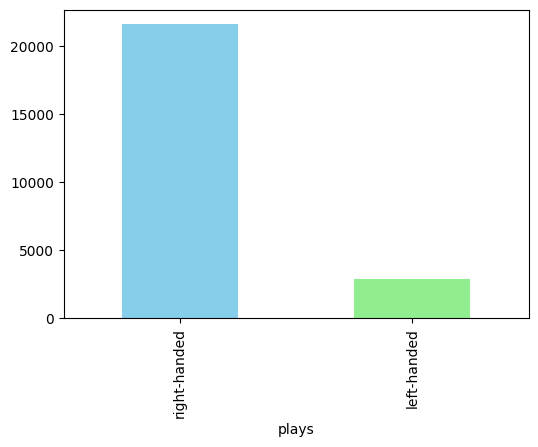

In [4]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
count.plot(kind='bar',color=['skyblue','lightgreen'])

14-What is the most common type of surface used in tournaments?

In [5]:
import pandas as pd
path = "../data/processed/tournament.csv"
tournament=pd.read_csv(path)
#first check the null data by counting them
number_of_null_data=tournament['ground_type'].isnull().sum()
print("Number of Null data before cleaning:",number_of_null_data)
#Start cleaning the data
davis_cup_rows = tournament[tournament["tournament_category_name"] == "Davis Cup"]
#all ground_type of davis cup is NaN
davis_cup_rows["ground_type"].isna().all()
#ground type is dependent on host so it is normal that the value is NaN
tournament.loc[tournament["tournament_category_name"] == "Davis Cup", "ground_type"] = "Host-dependent"
tournament[tournament['ground_type'].isnull()]['tournament_category_name']
itef_men_rows = tournament[tournament["tournament_category_name"] == "ITF Men"]
#find the most common type of ground of ITF Men in order to fill the null amounts
most_common_ground_type_of_itf_men=itef_men_rows['ground_type'].value_counts().idxmax()
tournament.loc[tournament["tournament_category_name"] == "ITF Men", "ground_type"] = most_common_ground_type_of_itf_men
#count the null data in order to be sure of cleaning null data
number_of_null_data_after_cleaning=tournament['ground_type'].isnull().sum()
print("Number of Null data after cleaning:",number_of_null_data_after_cleaning)
#data is cleaned and there is no null data for ground type column
most_common_ground_type_of_tournament=tournament['ground_type'].value_counts().idxmax()
count=tournament['ground_type'].value_counts().max()
print(f"The most common type of surface is:{most_common_ground_type_of_tournament} in {count} tournaments")

Number of Null data before cleaning: 562
Number of Null data after cleaning: 0
The most common type of surface is:Hardcourt outdoor in 24845 tournaments


15-How many distinct countries are represented in the dataset?

In [6]:
import pandas as pd
away_team=pd.read_csv("../data/processed/away_team.csv")
home_team=pd.read_csv("../data/processed/home_team.csv")
venue_team=pd.read_csv("../data/processed/venue.csv")


dataset_all_countries=pd.concat([away_team['country'],home_team['country'],venue_team['country']],ignore_index=True)
#Check for null values
dataset_all_countries.isna().sum()
#Clean the data and drop null values
dataset_all_countries_cleaned = dataset_all_countries.dropna()
#If we consider Scotlan and England and United Kingdom as one country 
# then we should replace Scotland and England with United Kingdom
processed_countries = dataset_all_countries_cleaned.replace({
    "Scotland": "United Kingdom",
    "England": "United Kingdom"
})

# 4. Select unique values
distinct_dataset_all_countries = processed_countries.unique()

# 5. Print result
number_of_distinct_dataset_all_countries = len(distinct_dataset_all_countries)
print(f"{number_of_distinct_dataset_all_countries} distinct countries found in the dataset as follows:")
print(distinct_dataset_all_countries)


106 distinct countries found in the dataset as follows:
['Canada' 'Italy' 'Spain' 'France' 'Kazakhstan' 'Japan' 'Australia' 'USA'
 'Germany' 'United Kingdom' 'Argentina' 'Switzerland' 'Russia' 'China'
 'Croatia' 'Denmark' 'Hungary' 'South Africa' 'Ukraine' 'Czech Republic'
 'Slovakia' 'Belarus' 'Netherlands' 'Poland' 'Estonia' 'Slovenia'
 'Dominican Republic' 'Cyprus' 'Sweden' 'Serbia' 'Hong Kong' 'Egypt'
 'Finland' 'Greece' 'Turkey' 'Austria' 'Philippines' 'Latvia' 'Brazil'
 'South Korea' 'Georgia' 'Romania' 'Mexico' 'Bulgaria' 'Portugal'
 'Belgium' 'Ecuador' 'Syria' 'Costa Rica' 'Luxembourg' 'Zimbabwe'
 'Morocco' 'India' 'Bosnia & Herzegovina' 'Indonesia' 'Israel'
 'Chinese Taipei' 'Thailand' 'Moldova' 'Monaco' 'Peru' 'Barbados'
 'New Zealand' 'Norway' 'Guadeloupe' 'Colombia' 'Algeria' 'Uzbekistan'
 'Tunisia' 'Jordan' 'Chile' 'Uruguay' 'North Macedonia' 'Malta'
 'Liechtenstein' 'Kyrgyzstan' 'Lebanon' 'Bahamas' 'Paraguay' 'Bolivia'
 'New Caledonia' 'Lithuania' 'Ivory Coast' 'Ireland' 

16-Which player has the highest winning percentage against top 10 ranked opponents?

In [7]:
import pandas as pd


home_team = pd.read_csv("../data/processed/home_team.csv")
home_team = home_team[['match_id','full_name','current_rank','player_id']]

away_team = pd.read_csv("../data/processed/away_team.csv")
away_team = away_team[['match_id','full_name','current_rank','player_id']]

event = pd.read_csv("../data/processed/event.csv")
event = event[['match_id','winner_code']]


matches = home_team.merge(away_team, on='match_id', suffixes=("_home","_away"))
matches = event.merge(matches, on='match_id')


matches = matches.dropna(subset=['current_rank_home','current_rank_away','winner_code'])
home_vs_top_rank10 = matches[matches['current_rank_away'] <= 10].copy()
away_vs_top_rank10 = matches[matches['current_rank_home'] <= 10].copy()


home_vs_top_rank10['is_win'] = home_vs_top_rank10['winner_code']==1
away_vs_top_rank10['is_win'] = away_vs_top_rank10['winner_code']==2

home_stat = home_vs_top_rank10.groupby(['player_id_home','full_name_home']).agg(
    wins=('is_win','sum'),
    counts=('is_win','count')
).reset_index()

away_stat = away_vs_top_rank10.groupby(['player_id_away','full_name_away']).agg(
    wins=('is_win','sum'),
    counts=('is_win','count')
).reset_index()
home_stat = home_stat.rename(columns={
    'player_id_home':'player_id',
    'full_name_home':'full_name',
    'wins':'home_wins',
    'counts':'home_matches'
})

away_stat = away_stat.rename(columns={
    'player_id_away':'player_id',
    'full_name_away':'full_name',
    'wins':'away_wins',
    'counts':'away_matches'
})
home_stat
total_stat=pd.merge(home_stat,away_stat,on=['player_id','full_name'],how='outer').fillna(0)
total_stat['total_wins']=total_stat['home_wins']+total_stat['away_wins']
total_stat['total_matches']=total_stat['home_matches']+total_stat['away_matches']
total_stat['percentage_of_wins']=total_stat['total_wins']/total_stat['total_matches']*100
total_stat = total_stat[total_stat['total_matches'] >= 2]
top_player = total_stat.sort_values(by='percentage_of_wins', ascending=False).iloc[0]
print(top_player[['full_name','percentage_of_wins','total_matches']])




full_name             Michelsen, Alex
percentage_of_wins              100.0
total_matches                     8.0
Name: 134, dtype: object


17-What is the average number of breaks of serve per match?

In [19]:
import pandas as pd

statistics_df = pd.read_csv("../data/processed/statistics.csv")

#   select break_points_converted
breaks = statistics_df[statistics_df['statistic_name'] == 'break_points_converted'].copy()
#calculate real break point for home and away
breaks['total_breaks'] = breaks['home_value'] + breaks['away_value']
#calculate mean
avg_breaks_per_match = breaks.groupby('match_id')['total_breaks'].sum().mean()
print(f"The average number of breaks of serve per match is {avg_breaks_per_match}")


The average number of breaks of serve per match is 26.232423417888178
